In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 1000)
import numpy as np
import pyodbc
import datetime
import copy
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import time
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Read the data from csv
bank = pd.read_csv("C:/Users....bank-full.csv",sep = ';')

# Data Understanding + Data Visulization 

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#basic info from data table
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


In [5]:
#data types for each column
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#checking the null value 
null_counts =bank.isnull().sum()
null_counts

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check the data distribution of job feature 
bank.groupby('job')['y'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: y, dtype: int64

In [8]:
#check the data distribution of marital feature 
bank.groupby('marital')['y'].count()

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

In [9]:
#check the data education of job feature 
bank.groupby('education')['y'].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: y, dtype: int64

In [10]:
36959 / 45211 

0.8174780473778506

In [11]:
print('credit in default:', bank.groupby('default')['y'].count())
print('housing loan:', bank.groupby('housing')['y'].count())
print('personal loan:', bank.groupby('loan')['y'].count())

credit in default: default
no     44396
yes      815
Name: y, dtype: int64
housing loan: housing
no     20081
yes    25130
Name: y, dtype: int64
personal loan: loan
no     37967
yes     7244
Name: y, dtype: int64


In [12]:
bank.groupby('contact')['y'].count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: y, dtype: int64

In [13]:
bank.groupby('poutcome')['y'].count()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: y, dtype: int64

# Client related variable 

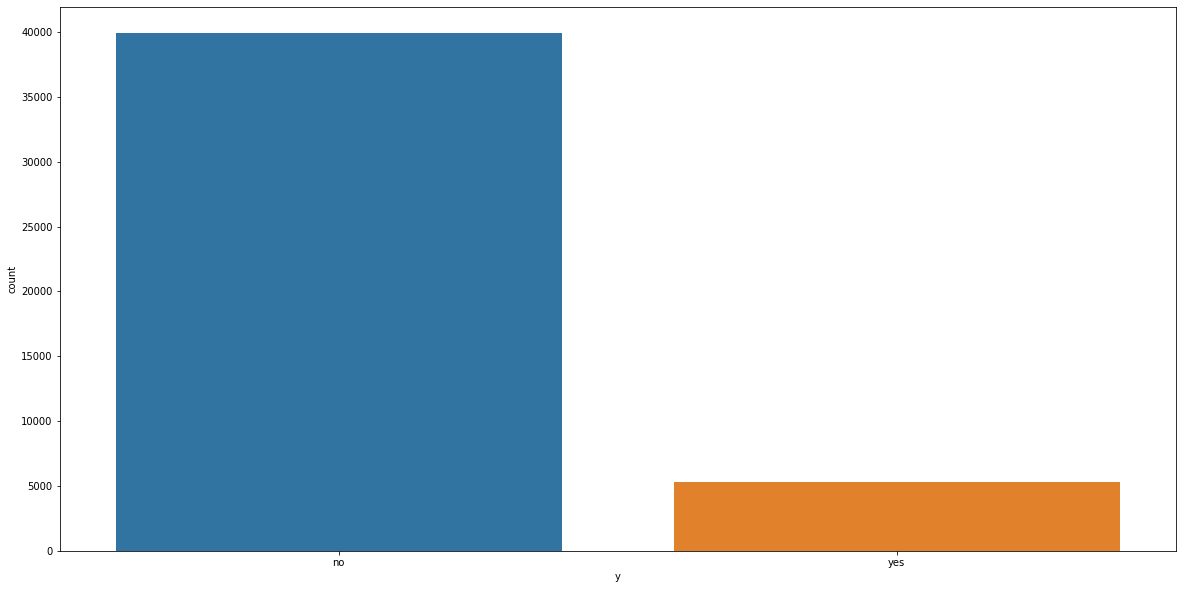

In [14]:
#check the data distribution of subscription result 
sns.countplot(data=bank, x = 'y')

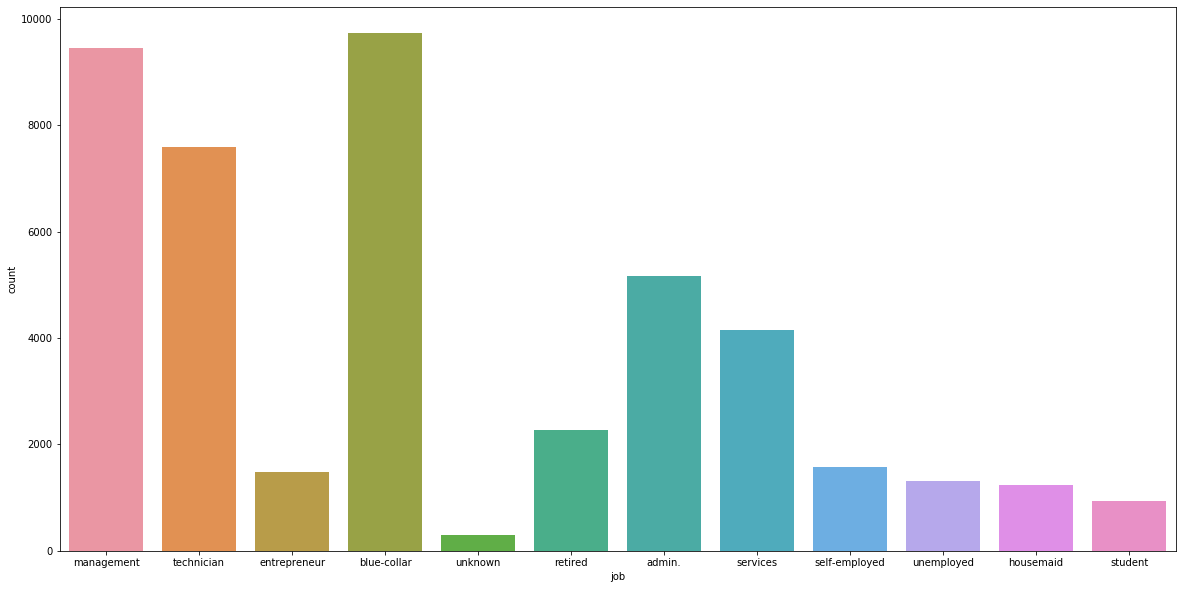

In [15]:
sns.countplot(data=bank, x = 'job')

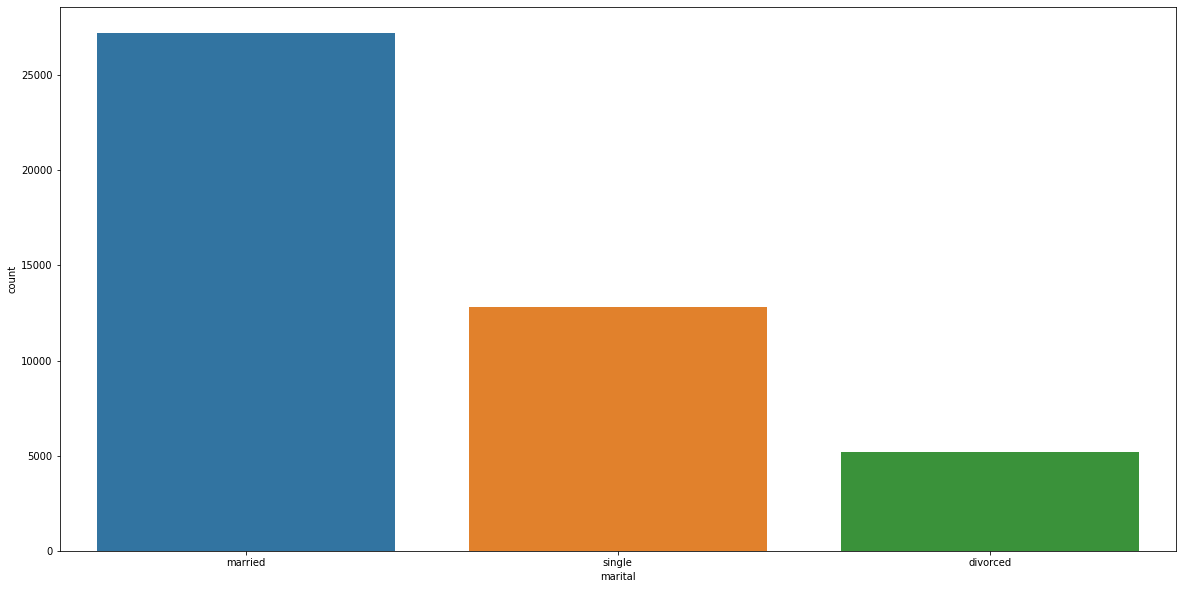

In [16]:
sns.countplot(data=bank, x = 'marital')

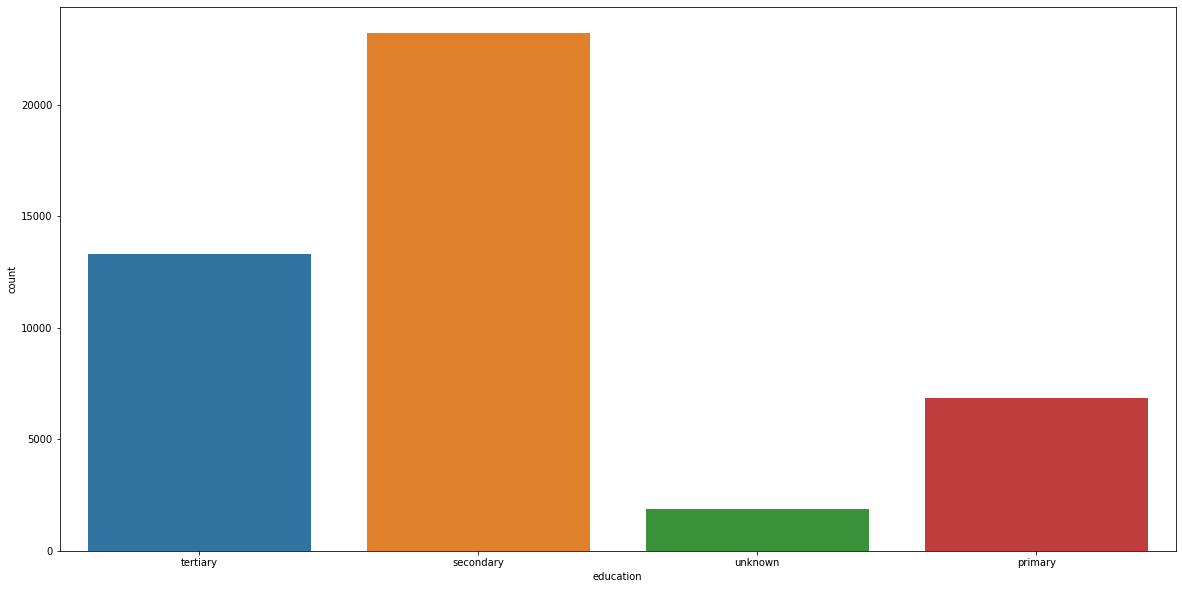

In [17]:
sns.countplot(data=bank, x = 'education')

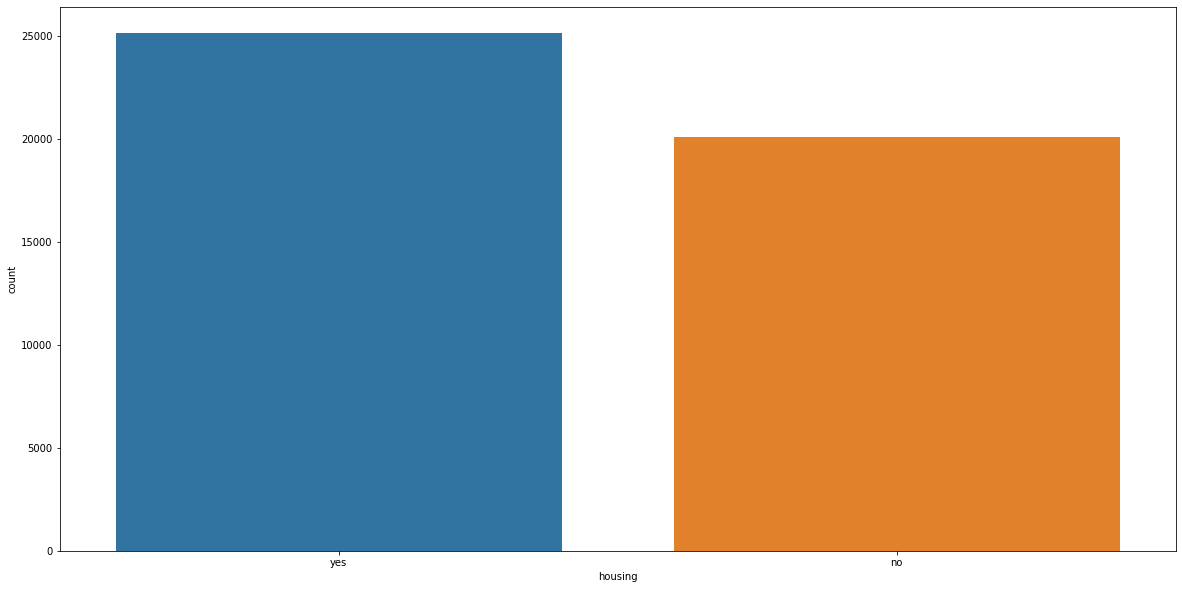

In [18]:
sns.countplot(data=bank, x = 'housing')

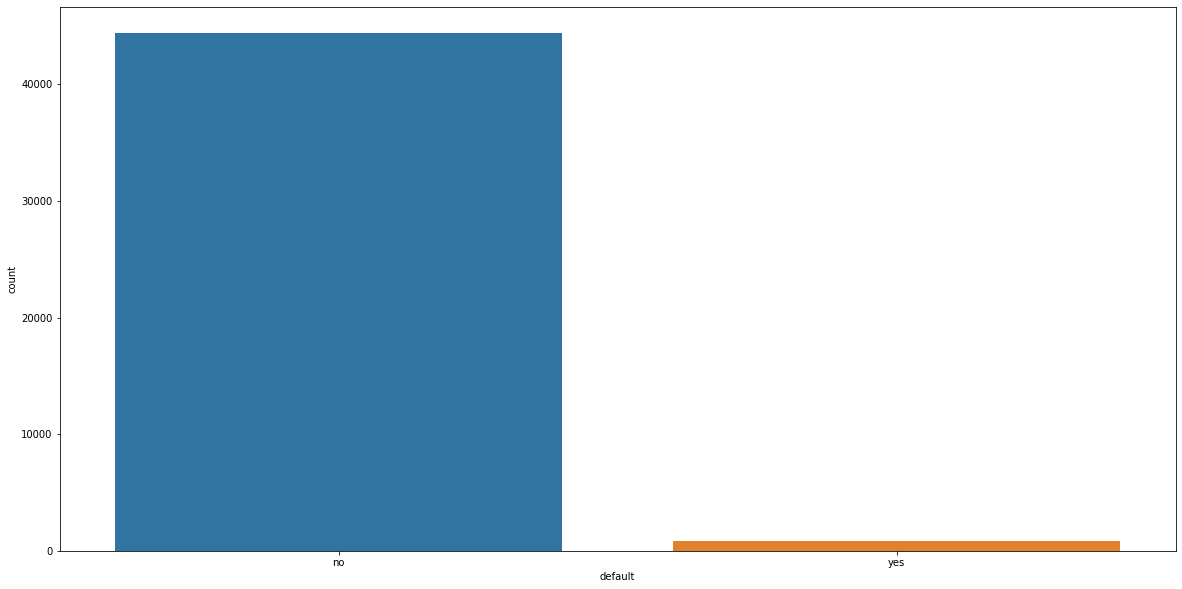

In [19]:
sns.countplot(data=bank, x = 'default')

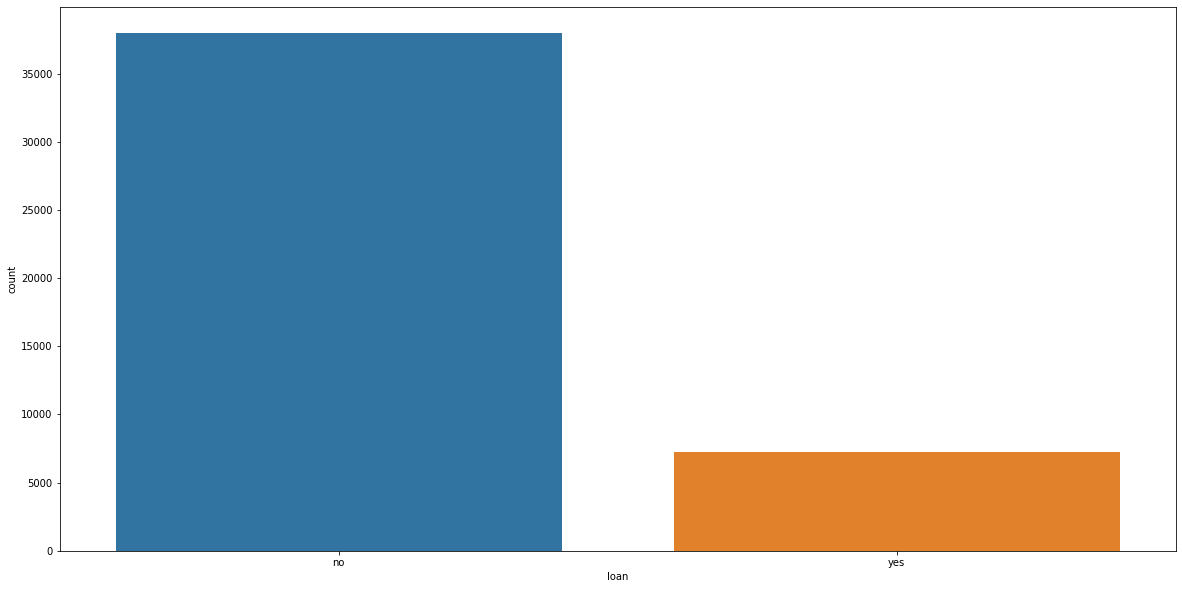

In [20]:
sns.countplot(data=bank, x = 'loan')

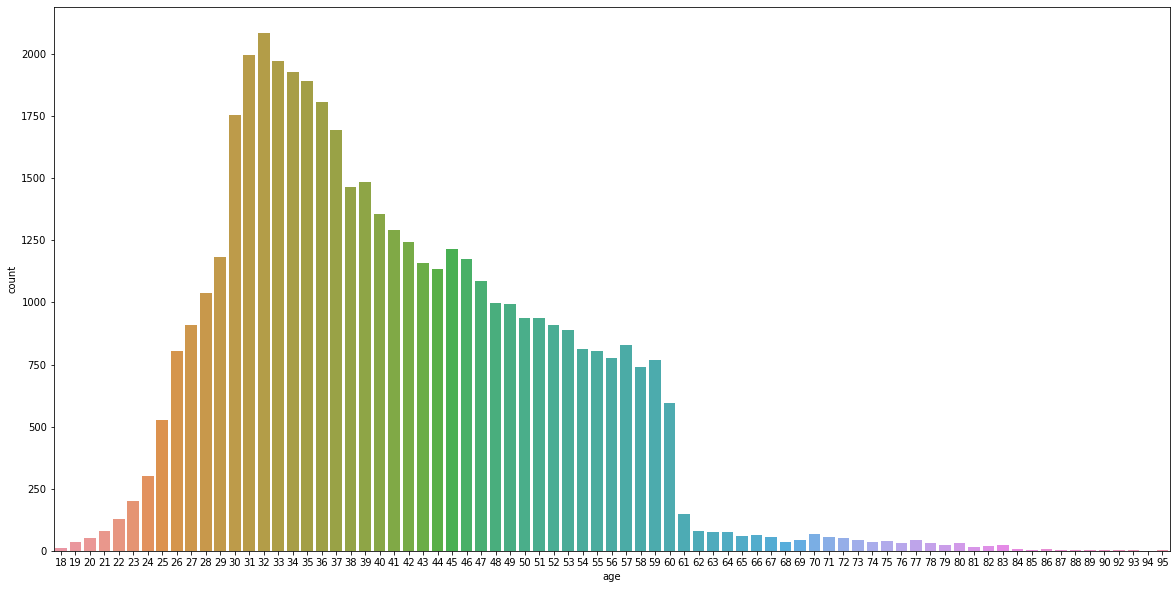

In [21]:
sns.countplot(data=bank, x = 'age')

Text(0.5, 0, 'Age')

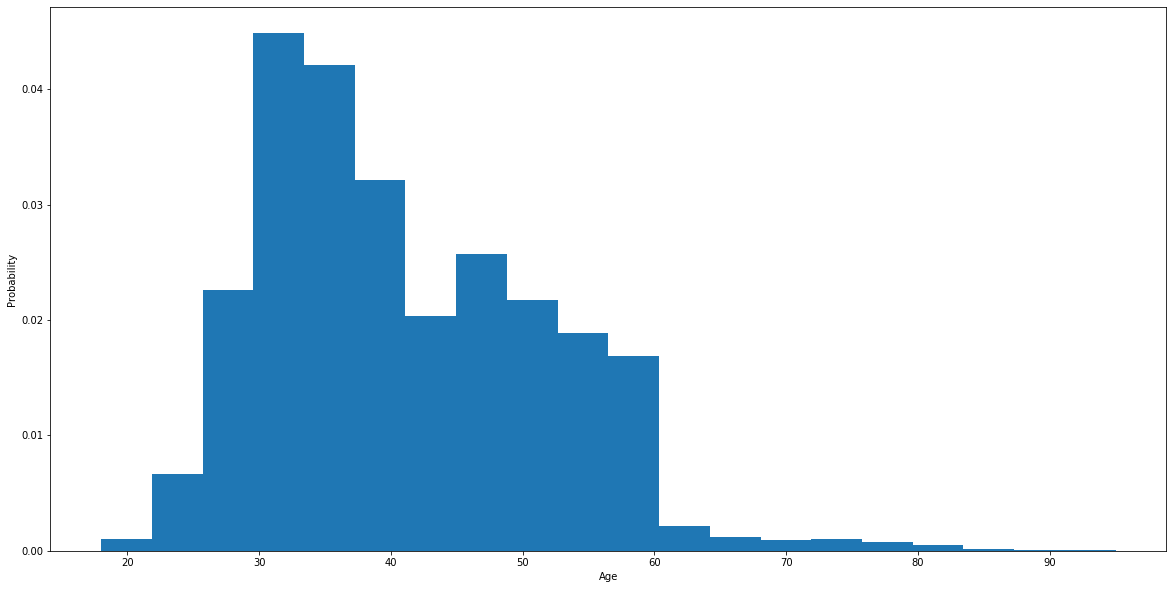

In [22]:
plt.hist(bank.age, density=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Age')

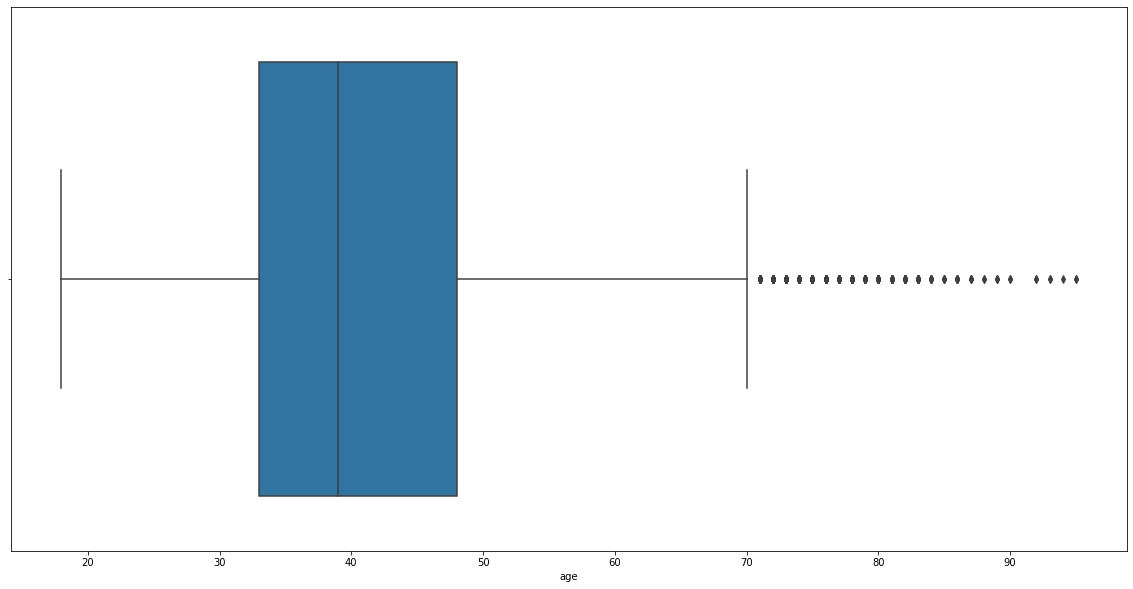

In [23]:
sns.boxplot(data=bank, x = 'age')

In [24]:
#Interquartile Range (IQR)= (Q3 - Q1)  
#Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker
print('Q1:', bank['age'].quantile(q = 0.25))
print('Q2:', bank['age'].quantile(q = 0.50))
print('Q3:', bank['age'].quantile(q = 0.75))
print('Q4:', bank['age'].quantile(q = 1.00))

Q1: 33.0
Q2: 39.0
Q3: 48.0
Q4: 95.0


In [25]:
# Outlier for age
from scipy import stats
bank['age_outlier'] = stats.zscore(bank['age'])
condition1 = (bank['age_outlier']>3) | (bank['age_outlier']<-3 )
bank = bank.drop(bank[condition1].index, axis = 0, inplace = False)
bank = bank.drop('age_outlier', axis=1)

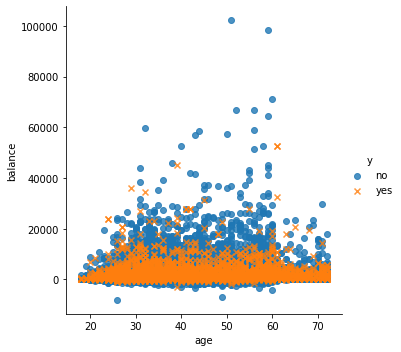

In [26]:
sns.lmplot(x="age", y="balance", hue="y", data=bank,  markers=["o", "x"], fit_reg = False)
#There is no clear relationship showed between client’s age and balance level

# campaign realated variable

In [27]:
print('contact communication type:', bank.groupby('contact')['y'].count())
print('last contact month of year:', bank.groupby('month')['y'].count())
print('last contact day of the month:', bank.groupby('day')['y'].count())

contact communication type: contact
cellular     29099
telephone     2711
unknown      13020
Name: y, dtype: int64
last contact month of year: month
apr     2883
aug     6195
dec      201
feb     2603
jan     1386
jul     6873
jun     5328
mar      450
may    13749
nov     3947
oct      681
sep      534
Name: y, dtype: int64
last contact day of the month: day
1      313
2     1285
3     1069
4     1429
5     1903
6     1921
7     1805
8     1829
9     1540
10     519
11    1460
12    1579
13    1565
14    1833
15    1683
16    1398
17    1923
18    2300
19    1749
20    2742
21    2019
22     891
23     927
24     439
25     827
26    1022
27    1107
28    1818
29    1739
30    1556
31     640
Name: y, dtype: int64


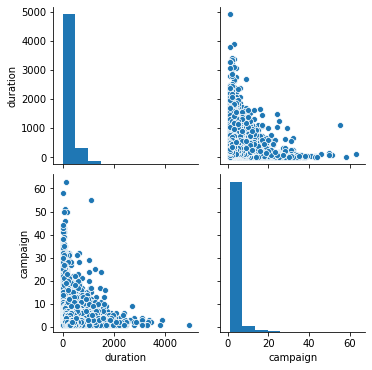

In [28]:
df = bank[['duration','campaign']]

sns.pairplot(df, kind="scatter")
plt.show()

Text(0.5, 0, 'Duration')

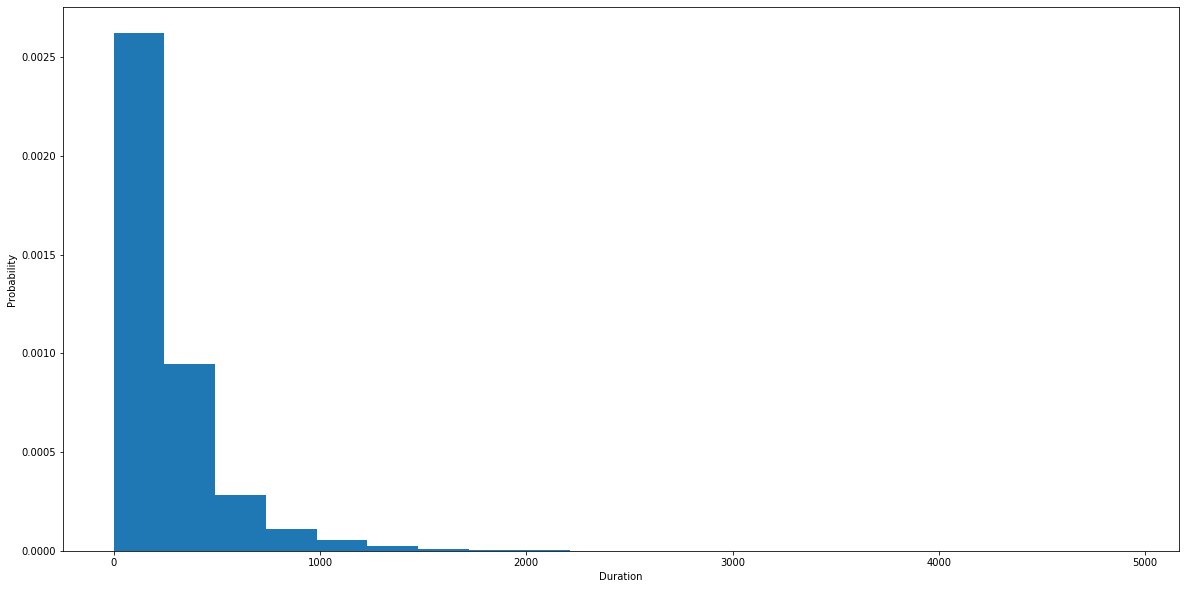

In [29]:
plt.hist(bank.duration, density=True, bins=20)
plt.ylabel('Probability')
plt.xlabel('Duration')

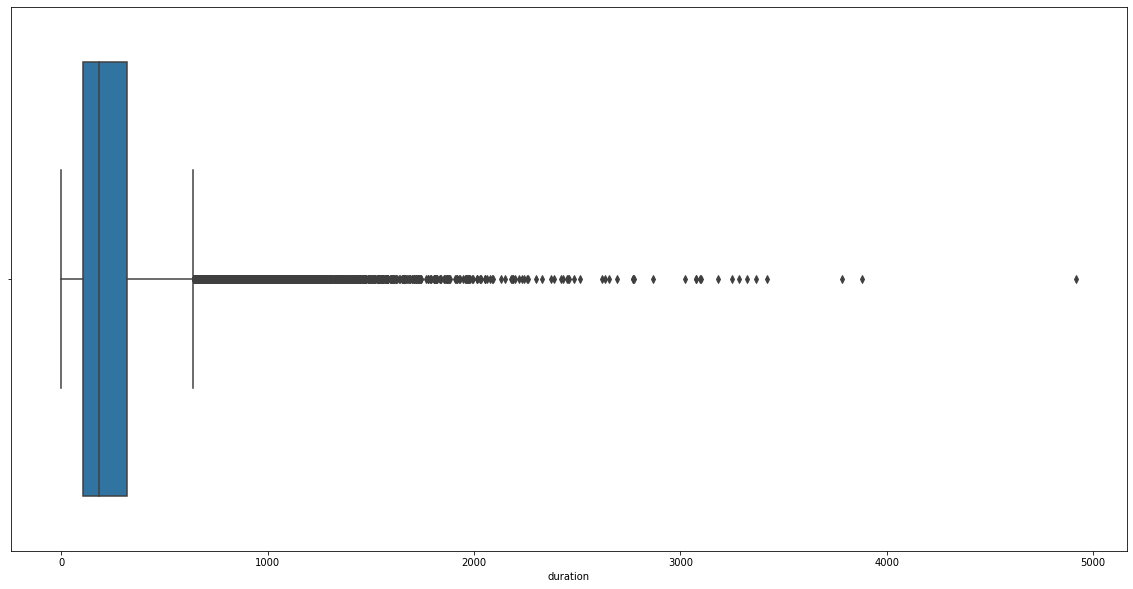

In [30]:
sns.boxplot(data=bank, x = 'duration')

In [31]:
bank['duration'] = bank['duration']/60

In [32]:
#Interquartile Range (IQR)= (Q3 - Q1)  
#Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker
print('Q1:', bank['duration'].quantile(q = 0.25))
print('Q2:', bank['duration'].quantile(q = 0.50))
print('Q3:', bank['duration'].quantile(q = 0.75))
print('Q4:', bank['duration'].quantile(q = 1.00))

Q1: 1.7166666666666666
Q2: 3.0
Q3: 5.3
Q4: 81.96666666666667


In [33]:
#Outlier for duration
bank['duration_outlier'] = stats.zscore(bank['duration'])
condition1 = (bank['duration_outlier']>3) | (bank['duration_outlier']<-3 )
bank = bank.drop(bank[condition1].index, axis = 0, inplace = False)
bank = bank.drop('duration_outlier', axis=1)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.517,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.267,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,6.433,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.467,4,-1,0,unknown,no


Text(0.5, 20.80000000000002, 'Duration of Calls (Minutes)')

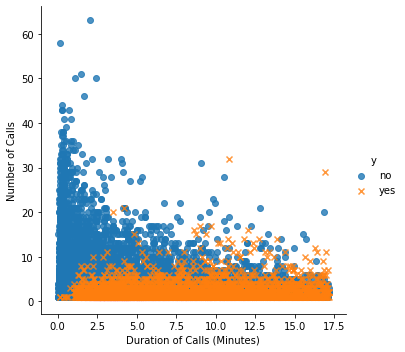

In [34]:
sns.lmplot(x="duration", y="campaign", hue="y", data=bank,  markers=["o", "x"], fit_reg = False)
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')

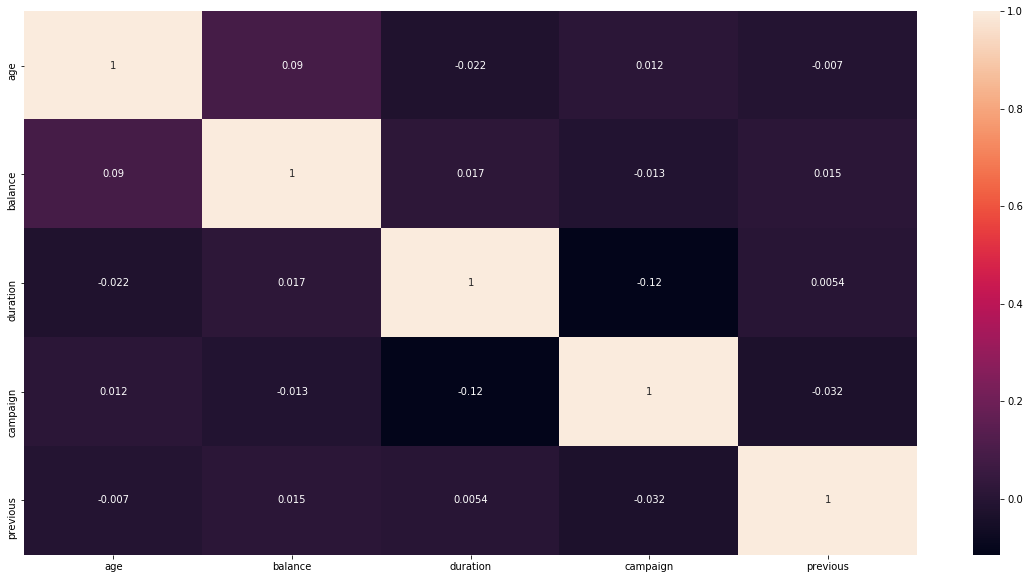

In [35]:
data = bank[['age','balance','duration','campaign','poutcome','previous']]
corr = data.corr()
ax = sns.heatmap(corr, annot=True,)

In [36]:
bank1 = copy.copy(bank)

In [37]:
#define the age groups for age feature

def f(row):
    if row['age'] <= 33:
        val = 1
    elif (row['age'] > 33)& (row['age'] <= 39):
        val = 2
    elif (row['age'] > 39)& (row['age'] <= 48):
        val = 3   
    elif (row['age'] > 48)& (row['age'] <= 71):
        val = 4 
    else:
        val = 5
    return val


bank1['age_group'] = bank1.apply(f, axis=1)

In [38]:
bank1.groupby('age_group')['y'].count()

age_group
1    12804
2    10044
3    10443
4    10528
5       50
Name: y, dtype: int64

In [39]:
print('Q1:', bank1['balance'].quantile(q = 0.25))
print('Q2:', bank1['balance'].quantile(q = 0.50))
print('Q3:', bank1['balance'].quantile(q = 0.75))
print('Q4:', bank1['balance'].quantile(q = 1.00))

Q1: 70.0
Q2: 440.0
Q3: 1407.0
Q4: 102127.0


In [40]:
#Outlier for duration
bank['balance_outlier'] = stats.zscore(bank['balance'])
condition1 = (bank['balance_outlier']>3) | (bank['balance_outlier']<-3 )
bank = bank.drop(bank[condition1].index, axis = 0, inplace = False)
bank = bank.drop('balance_outlier', axis=1)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.517,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.267,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,6.433,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.467,4,-1,0,unknown,no


(array([3.72516951e-08, 1.59263414e-04, 1.78683964e-05, 2.85596329e-06,
        7.65729289e-07, 4.18046801e-07, 1.73841244e-07, 4.96689269e-08,
        4.55298496e-08, 3.31126179e-08, 1.24172317e-08, 1.65563090e-08,
        1.24172317e-08, 1.24172317e-08, 4.13907724e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.27815448e-09]),
 array([ -8019. ,  -2511.7,   2995.6,   8502.9,  14010.2,  19517.5,
         25024.8,  30532.1,  36039.4,  41546.7,  47054. ,  52561.3,
         58068.6,  63575.9,  69083.2,  74590.5,  80097.8,  85605.1,
         91112.4,  96619.7, 102127. ]),
 <a list of 20 Patch objects>)

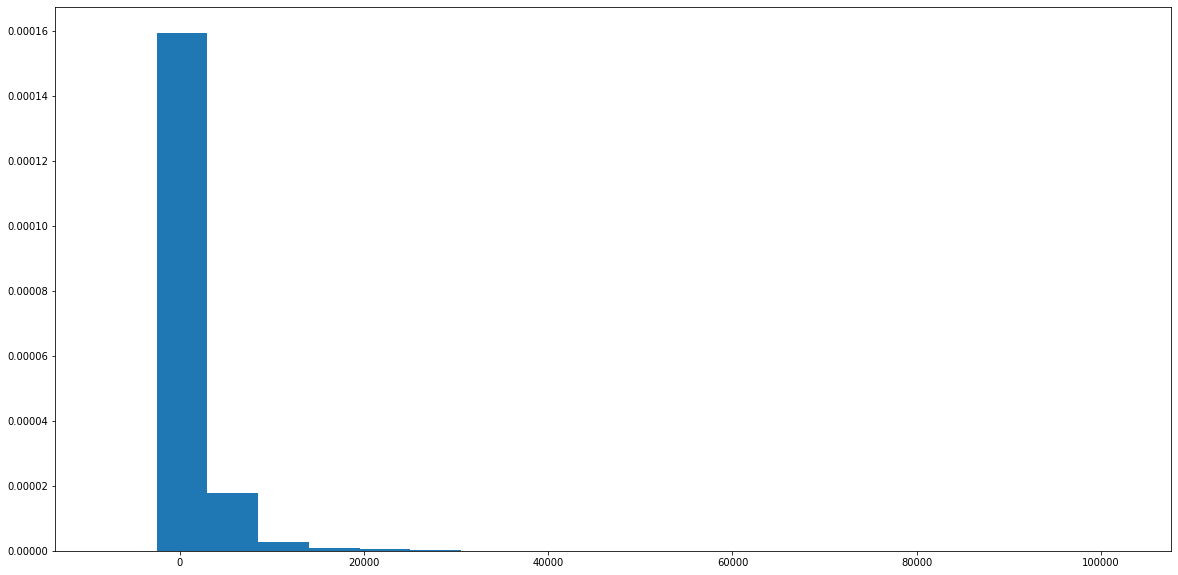

In [41]:
plt.hist(bank1.balance, density=True, bins=20)

In [42]:
#define the balance group for balance feature 
def f(row):
    if row['balance'] <= 0:
        val = 'No Balance'
    elif (row['balance'] > 0)& (row['balance'] <= 1000):
        val = 'Low Balance'
    elif (row['balance'] > 1000)& (row['balance'] <= 4000):
        val = 'Avg Balance'    
    else:
        val = 'High Balance'
    return val


bank1['balance_group'] = bank1.apply(f, axis=1)

In [43]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350,1,-1,0,unknown,no,4,Avg Balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.517,1,-1,0,unknown,no,3,Low Balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.267,1,-1,0,unknown,no,1,Low Balance
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533,1,-1,0,unknown,no,3,Avg Balance
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300,1,-1,0,unknown,no,1,Low Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,6.433,2,-1,0,unknown,yes,1,Low Balance
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283,3,-1,0,unknown,yes,4,Low Balance
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600,2,-1,0,unknown,yes,4,Avg Balance
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.467,4,-1,0,unknown,no,4,Low Balance


In [44]:
bank1.month = pd.to_datetime(bank1.month, format='%b').dt.month

# Data Preprocessing 

In [45]:
#remove missing value
bank1 = bank1[~(bank1['job'] == 'unknown')]
bank1 = bank1[~(bank1['education'] == 'unknown')]

In [46]:
#drop unneccessary feature 
bank1.drop(['contact', 'poutcome', 'balance_group', 'age_group'],axis=1, inplace=True)

In [47]:
#conver categorical feature to numerical
bank1 = pd.get_dummies(data = bank1, columns = ['job'] , prefix = ['job'] , drop_first = True)
bank1 = pd.get_dummies(data = bank1, columns = ['marital'] , prefix = ['marital'] , drop_first = True)
bank1 = pd.get_dummies(data = bank1, columns = ['education'], prefix = ['education'], drop_first = True)
bank1['housing'] = bank1['housing'].map({'yes': 1, 'no': 0})
bank1['default'] = bank1['default'].map({'yes': 1, 'no': 0})
bank1['loan'] = bank1['loan'].map({'yes': 1, 'no': 0})
bank1['y'] = bank1['y'].map({'yes': 1, 'no': 0})

In [78]:
bank.groupby('y')['y'].count()

y
no     38691
yes     4436
Name: y, dtype: int64

In [79]:
4436/(4436 + 38691)

0.10285899784357827

In [48]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,0,2143,1,0,5,5,4.350,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,44,0,29,1,0,5,5,2.517,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,33,0,2,1,1,5,5,1.267,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5,35,0,231,1,0,5,5,2.317,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6,28,0,447,1,1,5,5,3.617,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,0,505,0,1,17,11,6.433,2,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
45206,51,0,825,0,0,17,11,16.283,3,-1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
45207,71,0,1729,0,0,17,11,7.600,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
45209,57,0,668,0,0,17,11,8.467,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [49]:
bank1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary'],
      dtype='object')

In [80]:
#select features and result
x = bank1[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary']].values
y = bank1['y'].values

In [81]:
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#split the data into training and testing, 80% will be training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#only use oversampling on the training data
#sm = SMOTE(random_state=42)
#x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [82]:
#scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train1 = scale.fit_transform(X_train)
X_test1 = scale.transform(X_test)

In [126]:
#bulit the result dataframe
model_results_classification = pd.DataFrame(index=None, columns=['model','train_score','test_score', 'train_mse','test_mse'])

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score

parameters={"C":np.logspace(-3,3,7)}
lr=LogisticRegression(solver='lbfgs')
CV_lr=GridSearchCV(estimator=lr, param_grid=parameters, cv= 5)
CV_lr.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ",CV_lr.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 0.01}


In [127]:
model_name = 'LogisticRegression'
model = LogisticRegression(C = 0.01)
model.fit(X_train1, y_train)
y_train_lg = model.predict(X_train1)
y_pred_lg = model.predict(X_test1)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train, y_train_lg)
test_accuracyscore = accuracy_score(y_test, y_pred_lg)                        
train_mse = mean_squared_error(y_train, y_train_lg)
test_mse = mean_squared_error(y_test, y_pred_lg)
#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse}),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse
0,LogisticRegression,0.901,0.905,0.099,0.095


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

parameters = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
CV_bc = GridSearchCV(estimator=bc, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
CV_bc.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ", CV_bc.best_params_)

tuned hpyerparameters :(best parameters)  {'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [128]:
model_name = 'DecisionTreeClassifier'
model_dt = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=6, random_state = 42)
model_dt.fit(x_train_res, y_train_res)
y_train_dt = model_dt.predict(X_train1)
y_pred_dt = model_dt.predict(X_test1)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train, y_train_dt)
test_accuracyscore = accuracy_score(y_test, y_pred_dt)                        
train_mse = mean_squared_error(y_train, y_train_dt)
test_mse = mean_squared_error(y_test, y_pred_dt)

#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse }),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse
0,LogisticRegression,0.901,0.905,0.099,0.095
1,DecisionTreeClassifier,0.894,0.898,0.106,0.102


In [129]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'RandomForestClassifier'
model = RandomForestClassifier(n_estimators=40)

model.fit(X_train1, y_train)
y_train_ada = model.predict(X_train1)
y_pred_ada = model.predict(X_test1)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train, y_train_ada)
test_accuracyscore = accuracy_score(y_test, y_pred_ada)                        
train_mse = mean_squared_error(y_train, y_train_ada)
test_mse = mean_squared_error(y_test, y_pred_ada)

#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse}),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse
0,LogisticRegression,0.901,0.905,0.099,0.095
1,DecisionTreeClassifier,0.894,0.898,0.106,0.102
2,RandomForestClassifier,0.999,0.910,0.001,0.090


In [117]:
38691 / 4436

8.72204688908927

In [118]:
from xgboost import XGBClassifier
parameters = {'gamma': [0.5, 1, 1.5, 2, 5],'max_depth': [3, 4, 5]}
xgb = XGBClassifier(scale_pos_weight=9)

# Grid Search to determine best parameters
CV_bc = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
CV_bc.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ", CV_bc.best_params_)

tuned hpyerparameters :(best parameters)  {'gamma': 1, 'max_depth': 5}


In [130]:
from xgboost import XGBClassifier

model_name = 'XGBoost'
model = XGBClassifier(scale_pos_weight=9, gamma = 1, max_depth = 5)

model.fit(X_train1, y_train)
y_train_xgb = model.predict(X_train1)
y_pred_xgb = model.predict(X_test1)

# Checking accuracy
train_accuracyscore = accuracy_score(y_train, y_train_xgb)
test_accuracyscore = accuracy_score(y_test, y_pred_xgb)                        
train_mse = mean_squared_error(y_train, y_train_xgb)
test_mse = mean_squared_error(y_test, y_pred_xgb)

#Saving results
model_results_classification = model_results_classification.append(pd.Series({'model':model_name,'train_score':train_accuracyscore,'test_score':test_accuracyscore, 'train_mse':train_mse, 'test_mse':test_mse}),ignore_index=True)
model_results_classification

,model,train_score,test_score,train_mse,test_mse
0,LogisticRegression,0.901,0.905,0.099,0.095
1,DecisionTreeClassifier,0.894,0.898,0.106,0.102
2,RandomForestClassifier,0.999,0.910,0.001,0.090
3,XGBoost,0.891,0.867,0.109,0.133


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7545
           1       0.43      0.81      0.56       841

    accuracy                           0.87      8386
   macro avg       0.70      0.85      0.75      8386
weighted avg       0.92      0.87      0.89      8386



In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb)

array([[6647,  898],
       [ 157,  684]], dtype=int64)

In [122]:
confusion_matrix(y_test, y_pred_lg)

array([[7424,  121],
       [ 678,  163]], dtype=int64)